In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
import seaborn as sns
%matplotlib inline
sns.set()
from scipy.stats import pearsonr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split



In [5]:
dat=pd.read_csv('yield.csv')

## Exploratory Data Analysis

In [6]:
dat.describe()

,Temp,Precipitation,SOM,AWC,Land Area,VPD,Yield(Tonnes/Hectare)
count,71449.000000,71449.000000,71449.000000,71449.000000,7.144900e+04,71449.000000,71449.000000
mean,17.191501,99.146498,2.521281,0.166235,4.904763e+05,9.182233,110.987716
std,3.635811,57.837865,1.722702,0.032307,4.871229e+05,2.268298,38.009641
min,3.676636,0.000000,0.000000,0.060680,4.122758e+04,2.857597,10.000000
25%,14.520791,59.062273,1.396782,0.146691,2.765714e+05,7.585401,84.000000
50%,17.074311,91.317226,1.892984,0.172582,3.731869e+05,8.813497,110.000000
75%,19.755257,130.310869,3.128257,0.193162,5.319360e+05,10.479185,137.300000
max,29.488654,597.273067,14.000000,0.233335,6.325916e+06,20.213063,264.100000


In [7]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71449 entries, 0 to 71448
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temp                   71449 non-null  float64
 1   Precipitation          71449 non-null  float64
 2   SOM                    71449 non-null  float64
 3   AWC                    71449 non-null  float64
 4   Land Area              71449 non-null  float64
 5   VPD                    71449 non-null  float64
 6   Yield(Tonnes/Hectare)  71449 non-null  float64
dtypes: float64(7)
memory usage: 3.8 MB


In [8]:
dat.head()

,Temp,Precipitation,SOM,AWC,Land Area,VPD,Yield(Tonnes/Hectare)
0,20.094990,58.196000,1.246915,0.148338,436036.480,10.490231,30.0
1,20.089992,66.334063,1.464472,0.145533,424346.048,10.957824,30.9
2,20.460485,77.305455,1.477992,0.142567,623394.944,10.875867,49.0
3,19.560460,54.228760,1.386158,0.155162,571869.760,10.147539,55.2
4,20.237434,73.198760,1.345140,0.152290,583355.968,10.643400,53.2


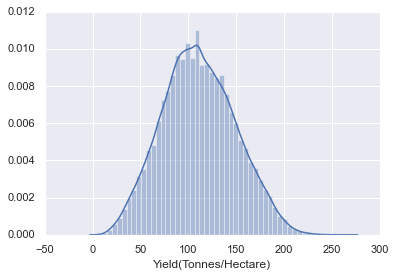

In [9]:
sns.distplot(dat['Yield(Tonnes/Hectare)'])

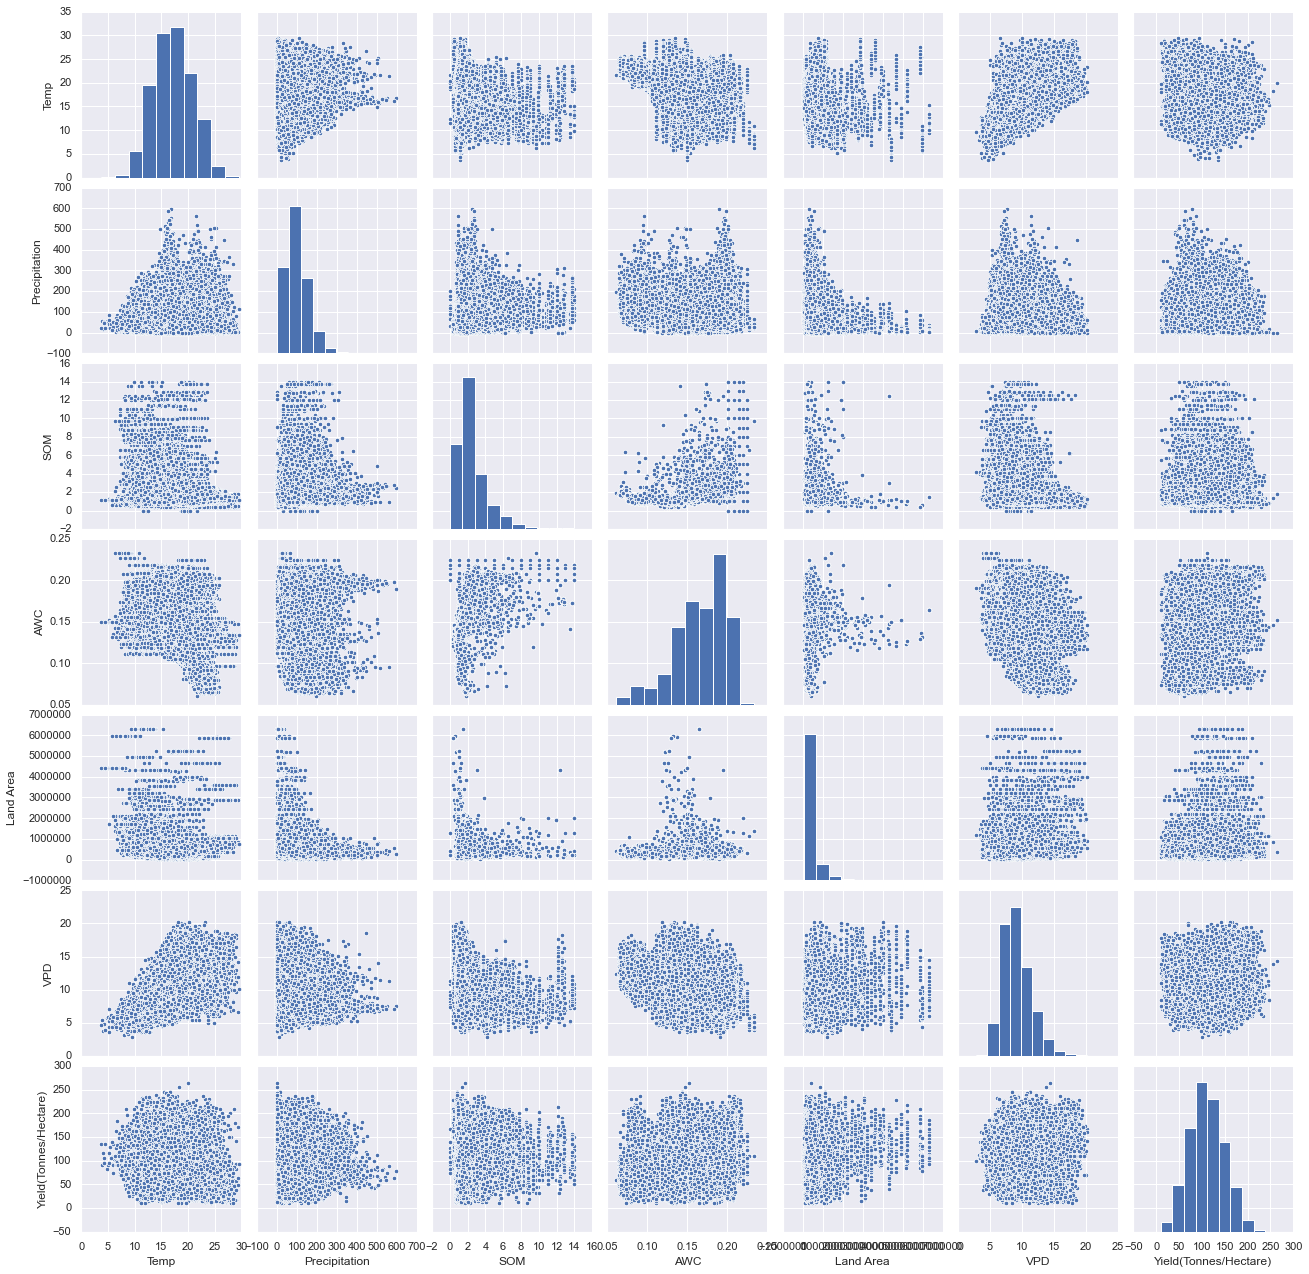

In [10]:
sns.pairplot(dat)

Correlation between features


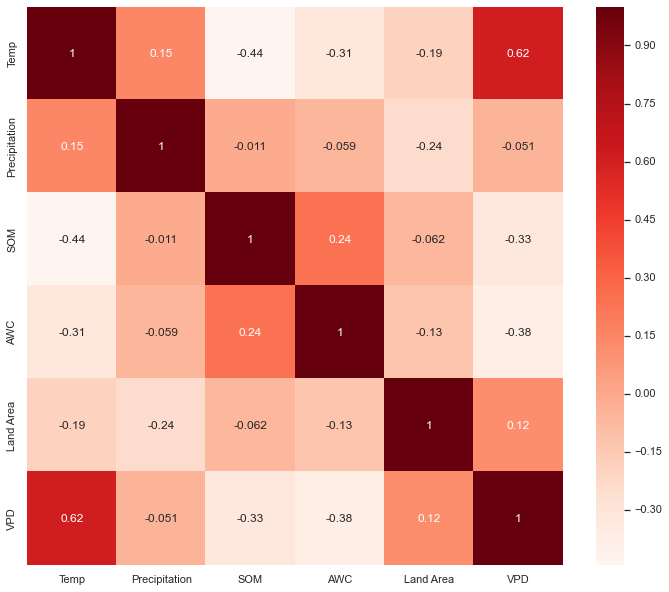

In [11]:
print("Correlation between features")
plt.figure(figsize=(12,10))
cor = dat.drop('Yield(Tonnes/Hectare)',axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


## Machine Learning model selection 
### Creiteria - MSE(Mean Squared Error)

## Yield Prediction

In [12]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(dat.drop(['Yield(Tonnes/Hectare)'],axis=1))
scaled_features = scaler.transform(dat.drop(['Yield(Tonnes/Hectare)'],axis=1))

In [13]:
df_feat = pd.DataFrame(scaled_features,columns=dat.columns[:-1])
df_feat.head()

,Temp,Precipitation,SOM,AWC,Land Area,VPD
0,0.798587,-0.708027,-0.739753,-0.553980,-0.111759,0.576647
1,0.797212,-0.567322,-0.613464,-0.640780,-0.135758,0.782791
2,0.899114,-0.377628,-0.605616,-0.732602,0.272867,0.746659
3,0.651567,-0.776620,-0.658925,-0.342747,0.167091,0.425567
4,0.837765,-0.448632,-0.682735,-0.431648,0.190671,0.644173


In [14]:
X = df_feat
y = dat['Yield(Tonnes/Hectare)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## KNN

Text(0, 0.5, 'Error Rate')

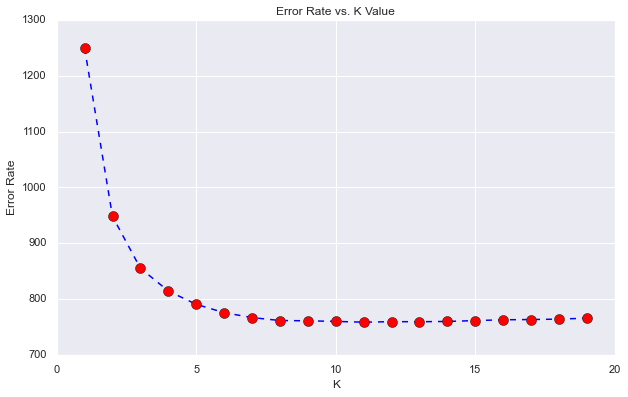

In [15]:
error_rate = []
from sklearn import metrics


# Will take some time
for i in range(1,20):
    
    knn = KNeighborsRegressor(n_neighbors=i,metric='euclidean')
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(metrics.mean_squared_error(pred_i,y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
#model selection

knn = KNeighborsRegressor(n_neighbors=10,metric='euclidean')
knn.fit(X_train, y_train)




KNeighborsRegressor(metric='euclidean', n_neighbors=10)

In [18]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [25]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(X_test)


Correlation b/w Predicted value and test value =  0.6889586587005003


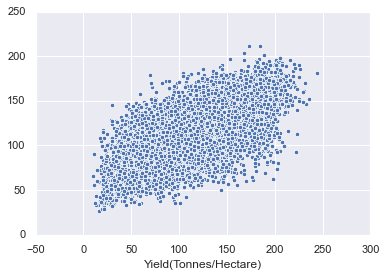

In [26]:
sns.scatterplot(x=y_test,y=y_pred)
cor,_=pearsonr(y_test,y_pred)
print("Correlation b/w Predicted value and test value = ",cor)

In [27]:
result = loaded_model.score(X_test, y_test)
print(result)

0.47408480825134147


In [28]:
print(X_test)

           Temp  Precipitation       SOM       AWC  Land Area       VPD
23406 -0.467757      -0.498291  1.467703  0.151222   0.144688 -0.337547
16176 -1.826430      -1.674590  0.128162 -0.324165  -0.147004  0.170028
2011   1.527590      -0.499362 -0.637774 -0.767749  -0.104876 -0.204007
65829  0.020932       0.076305 -0.178792  0.616420  -0.142636 -0.631769
59757 -0.483531      -0.053778 -0.369919  1.354845  -0.384469  0.283771
...         ...            ...       ...       ...        ...       ...
9081  -1.841006      -0.706863  2.430273  0.866554   0.218840 -0.968182
29182  1.137709       2.504645 -0.659058 -2.734507  -0.758719  1.003624
22308  0.247558      -0.569341 -0.773475 -1.342704  -0.631766 -0.623162
9969   1.845413       0.252569 -0.625265  0.879159   0.206725  1.343549
49181  0.874037       0.995118 -0.926676  0.835615  -0.129782 -0.746428

[21435 rows x 6 columns]


In [29]:
print(y_test)

23406    100.0
16176    125.0
2011      73.8
65829     91.5
59757    188.8
         ...  
9081      87.6
29182     95.8
22308     67.0
9969     120.0
49181    115.0
Name: Yield(Tonnes/Hectare), Length: 21435, dtype: float64


In [36]:
y = loaded_model.predict([[-0.483531    ,  -0.053778, -0.369919 , 1.354845 , -0.384469 , 0.283771]])
print(y)

[151.81]


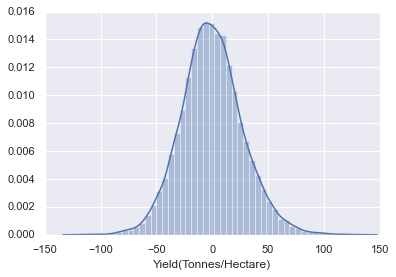

In [15]:
sns.distplot((y_test-y_pred),bins=50);

Model Evaluation

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Coefficient of determination (R2 score) =", round(metrics.r2_score(y_test, y_pred), 2))
print("Accuracy(Based on MAE)= ", (((110.987716-metrics.mean_absolute_error(y_test, y_pred))/110.987716)*100),"%")

MAE: 21.607271751807794
MSE: 768.0395776300443
RMSE: 27.713526979257697
Coefficient of determination (R2 score) = 0.47
Accuracy(Based on MAE)=  80.531834935852 %


## Ferilizer Recommendation

In [17]:
dfs = pd.read_excel('fert.xlsx', )


In [18]:
dfs.head()

,Fertilzers,Yield,Class
0,0–0–0,170,1
1,0–0–0,100,1
2,0–0–0,144,1
3,0–0–0,170,1
4,0–0–0,100,1


In [19]:
dfs.describe()

,Yield,Class
count,56.000000,56.000000
mean,232.178571,5.642857
std,51.897839,2.919705
min,100.000000,1.000000
25%,202.500000,3.000000
50%,229.500000,6.000000
75%,262.750000,8.000000
max,309.000000,10.000000


In [20]:
dfs = dfs.drop('Fertilzers',axis=1)

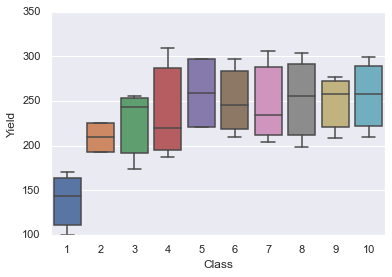

In [21]:
sns.boxplot(data=dfs,y='Yield',x='Class')

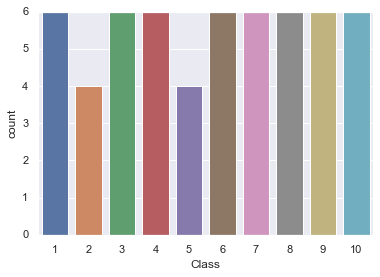

In [22]:
sns.countplot(data=dfs,x='Class')

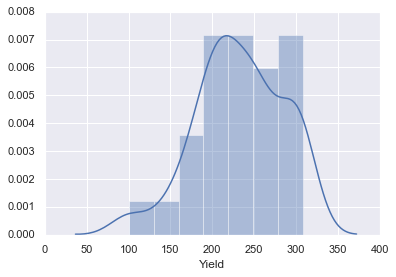

In [23]:
sns.distplot(dfs['Yield'])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(dfs.drop('Class',axis=1), 
                                                    dfs['Class'], test_size=0.15, 
                                                    random_state=101)
from sklearn.neighbors import KNeighborsClassifier

In [25]:
error_rate = []
from sklearn import metrics


# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

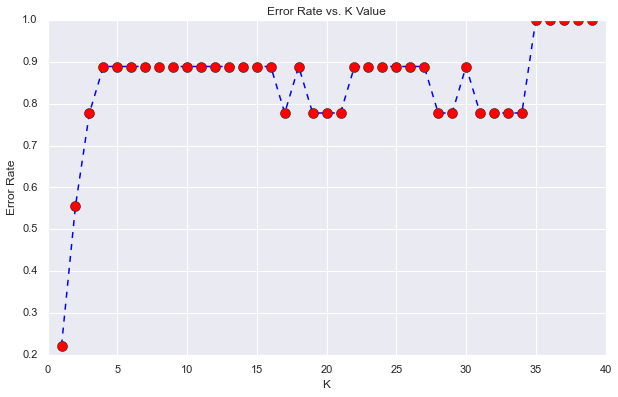

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1

    accuracy                           0.78         9
   macro avg       0.57      0.71      0.62         9
weighted avg       0.67      0.78      0.70         9



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
